# Introduction

The EGRETScenario handler operates by parsing raw json files that are outputs from the EGRET PCM tool. EGRET-to-Standard Technology mappings may still need modification.

See the **plexos_dispatch.ipynb** notebook for a more detailed introduction to using **marmot.quickplots**

In [5]:
from marmot.scenariohandlers import EGRETScenario
import marmot.quickplots as qp
import matplotlib.pyplot as plt


# TODO handle None values in Handler Init better.
# Directory of EGRET json files
ep = EGRETScenario(r"C:\Users\MWEBB\Downloads\EGRET_Data")
df = ep.get_generators()

df.head(2)

Unable to open map
Unable to open map
Unable to open map
Unable to open map


,101_CT_1,101_CT_2,101_STEAM_3,101_STEAM_4,102_CT_1,102_CT_2,102_STEAM_3,102_STEAM_4,107_CC_1,113_CT_1,...,320_RTPV_6,118_RTPV_7,118_RTPV_8,118_RTPV_9,118_RTPV_10,213_RTPV_1,309_WIND_1,317_WIND_1,303_WIND_1,122_WIND_1
index,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,63.0,76.0,0.0,0.0,40.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,142.8,511.331884,480.800000,713.200000
2020-01-01 01:00:00,0.0,0.0,63.3,60.7,0.0,0.0,40.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,139.1,794.400000,474.098127,370.447696


In [6]:
gen_tech = ep.get_generators_tech()
gen_tech.head(2)

Technology               Oil                 Coal                  Oil   
Generator           101_CT_1 101_CT_2 101_STEAM_3 101_STEAM_4 102_CT_1   
index                                                                    
2020-01-01 00:00:00      0.0      0.0        63.0        76.0      0.0  \
2020-01-01 01:00:00      0.0      0.0        63.3        60.7      0.0   

Technology                          Coal                  Gas           ...   
Generator           102_CT_2 102_STEAM_3 102_STEAM_4 107_CC_1 113_CT_1  ...   
index                                                                   ...   
2020-01-01 00:00:00      0.0        40.0        40.0      0.0      0.0  ...  \
2020-01-01 01:00:00      0.0        40.0        40.0      0.0      0.0  ...   

Technology                  PV                                                
Generator           320_RTPV_6 118_RTPV_7 118_RTPV_8 118_RTPV_9 118_RTPV_10   
index                                                                         
2020-01-01 00:00:00        0.0        0.0        0.0        0.0         0.0  \
2020-01-01 01:00:00        0.0        0.0        0.0        0.0         0.0   

Technology                           Wind                                      
Generator           213_RTPV_1 309_WIND_1  317_WIND_1  303_WIND_1  122_WIND_1  
index                                                                          
2020-01-01 00:00:00        0.0      142.8  511.331884  480.800000  713.200000  
2020-01-01 01:00:00        0.0      139.1  794.400000  474.098127  370.447696  

[2 rows x 156 columns]

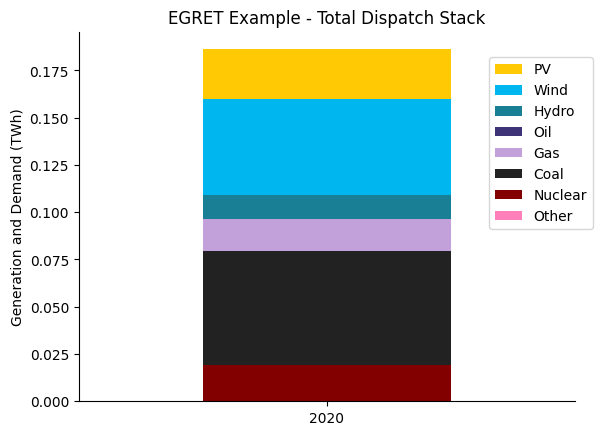

In [7]:
import marmot.quickplots as qp

# TODO add options to plot more granular technology types.

# Returns a matplotlib axes object
ax = qp.plot_annual_system_dispatch_stack(gen_tech)
ax.set_title("EGRET Example - Total Dispatch Stack")
plt.show()

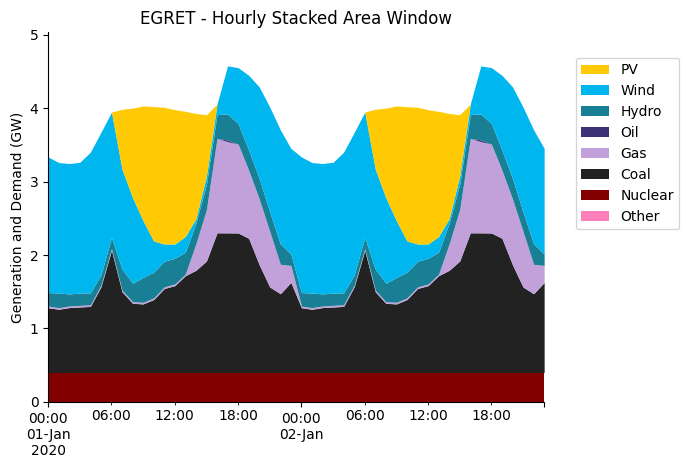

In [8]:
# TODO automatically aggregate by Technology if multi-level column.
# TODO once demand is available, can plot peak/min demand.
ax = qp.plot_stacked_area_window(gen_tech.groupby(level="Technology", axis=1).sum())

# Can update axes object to fit specific needs
ax.set_title("EGRET - Hourly Stacked Area Window")
plt.show()

# NOTES

More work is needed for EGRET plotting primarily.
1. Maps to Standard Tech
2. Parsing out Generator to Entity maps.
3. Parsing out Load from the EGRET JSON files.